In [ ]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

import pandas as pd
df = pd.read_csv("dzz.us (1).txt")


import pandas as lag_plot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot

df.head()

Saving dzz.us.txt to dzz.us (1).txt


,Date,Open,High,Low,Close,Volume,OpenInt
0,2008-02-28,24.99,24.99,24.33,24.34,6900,0
1,2008-02-29,24.48,24.64,24.24,24.26,17500,0
2,2008-03-03,23.60,23.90,23.45,23.67,35700,0
3,2008-03-04,23.73,25.25,23.60,24.75,131200,0
4,2008-03-05,24.23,24.36,23.32,23.67,73800,0


In [ ]:
print(df.head())
print(df.shape)
print(df.columns)

         Date   Open   High    Low  Close  Volume  OpenInt
0  2008-02-28  24.99  24.99  24.33  24.34    6900        0
1  2008-02-29  24.48  24.64  24.24  24.26   17500        0
2  2008-03-03  23.60  23.90  23.45  23.67   35700        0
3  2008-03-04  23.73  25.25  23.60  24.75  131200        0
4  2008-03-05  24.23  24.36  23.32  23.67   73800        0
(2445, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


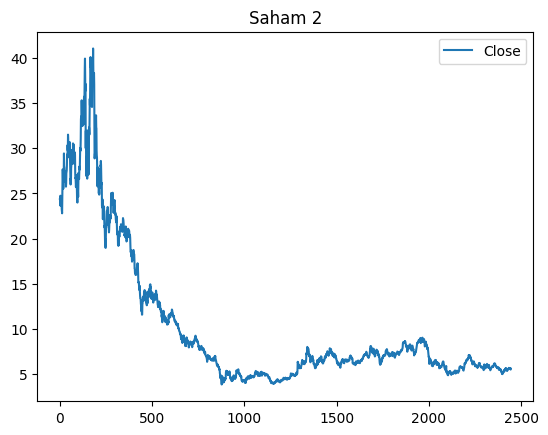

In [ ]:
df[['Close']].plot()
plt.title("Saham 2")
plt.show()

Text(0.5, 1.0, 'Saham dan ETF 2')

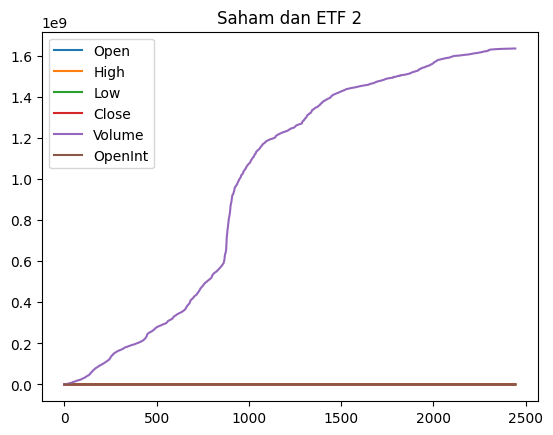

In [ ]:
dr = df.cumsum()
dr.plot()
plt.title('Saham dan ETF 2')

Text(0.5, 1.0, 'Saham Autocorrelation plot')

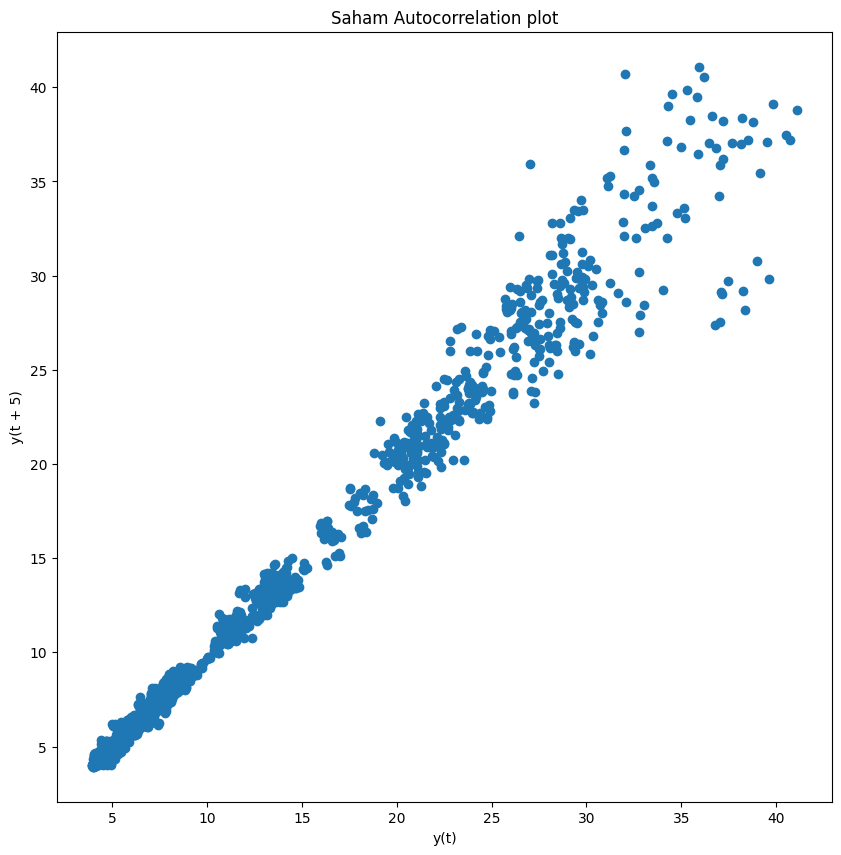

In [ ]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Saham Autocorrelation plot')

In [ ]:
df['Date'][1680]

'2014-10-30'

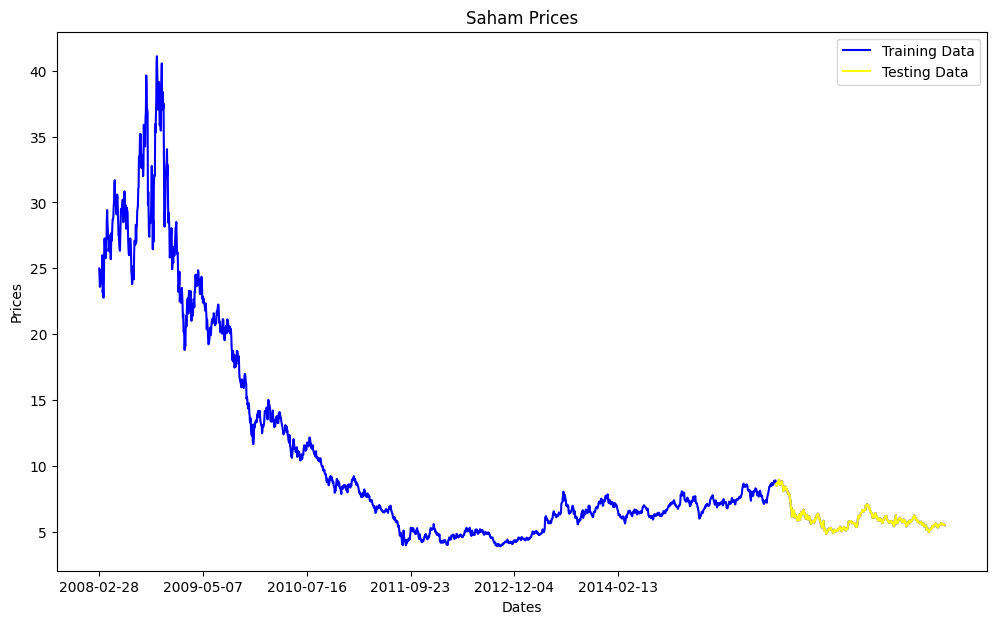

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Saham Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'yellow', label='Testing Data')
plt.xticks(np.arange(0,1785, 300), df['Date'][0:1785:300])
plt.legend()

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.017
Symmetric mean absolute percentage error: 1.516


<ipython-input-19-bec4e9185ecb>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "red" (-> color=(1.0, 0.0, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Open'], 'red', color='blue', label='Training Data')


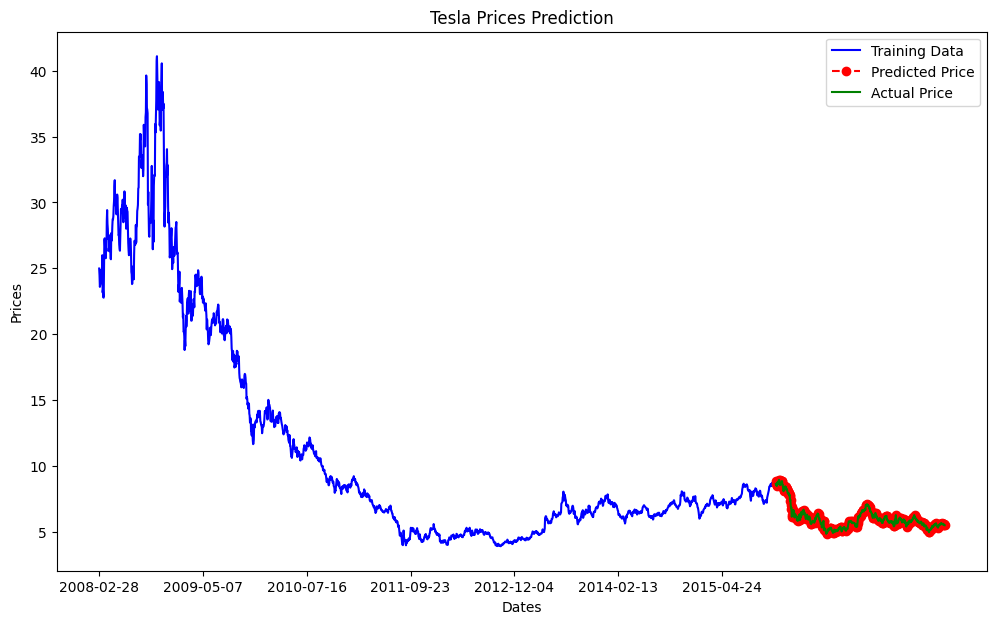

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'red', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='red', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='green', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

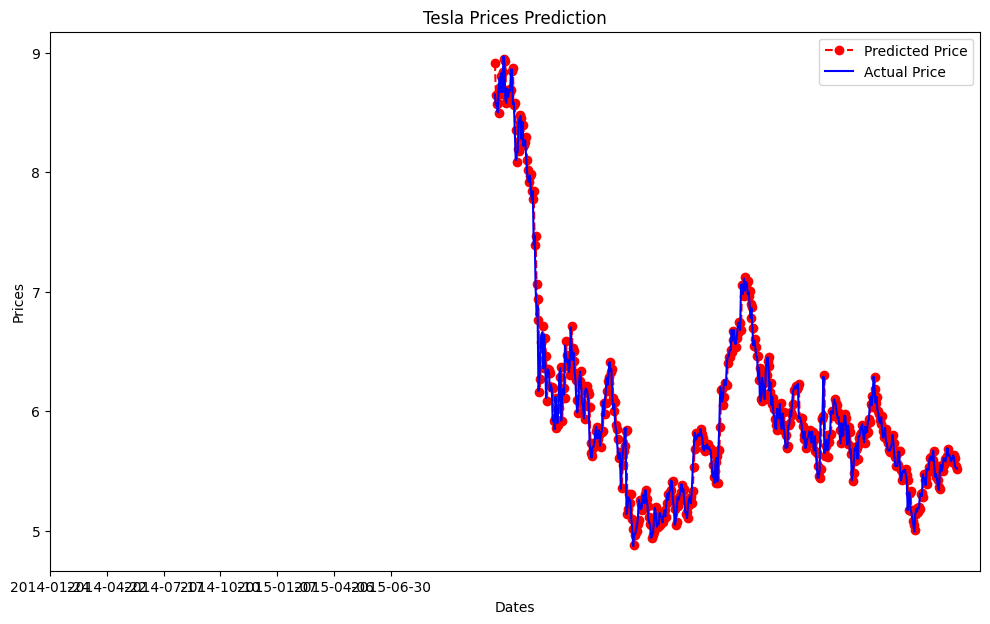

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='red', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='blue', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.0208
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0010
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 6.4906e-04
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 7.5543e-04
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 5.4535e-04
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 5.2069e-04
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 4.8027e-04
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 4.3361e-04
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 4.3896e-04
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 4.1110e-04
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 3.8393e-04
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 3.5099e-04
Epoch 13/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 3.1497e-04
Epoch 14/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 3.1380e-04
Epoch 15/50
59/59 ━━━━━━━━━━━━━━━━

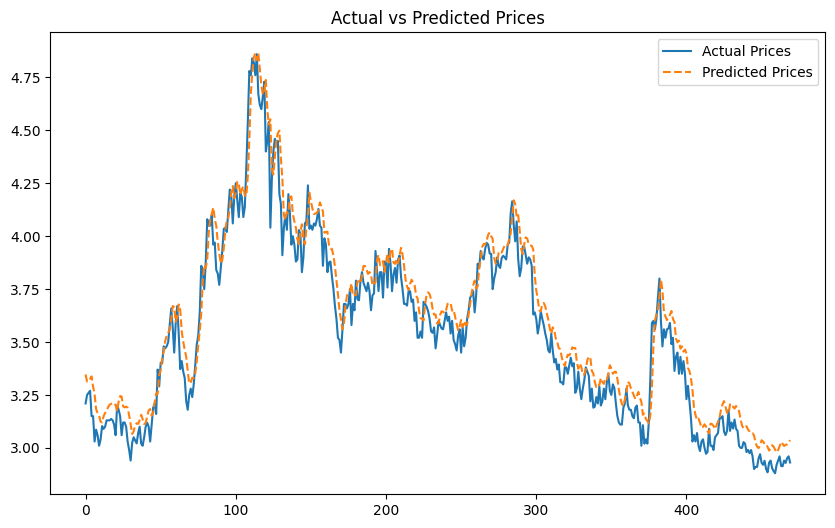

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

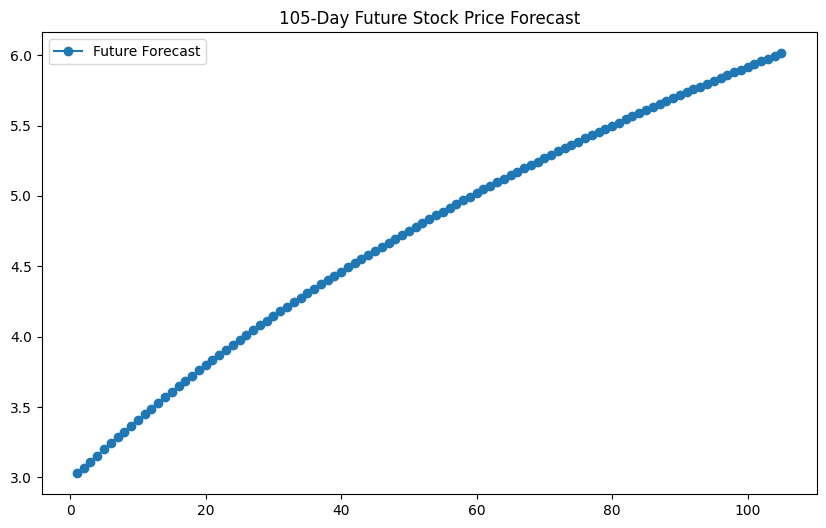

Prediksi harga masa depan:


array([[3.0291905],
       [3.066435 ],
       [3.1101844],
       [3.154518 ],
       [3.198353 ],
       [3.2414756],
       [3.28391  ],
       [3.3257585],
       [3.367127 ],
       [3.4080994],
       [3.4487233],
       [3.4890177],
       [3.5289786],
       [3.5685892],
       [3.607826 ],
       [3.646667 ],
       [3.6850927],
       [3.7230923],
       [3.7606564],
       [3.7977848],
       [3.834481 ],
       [3.8707519],
       [3.9066064],
       [3.9420555],
       [3.9771113],
       [4.0117855],
       [4.0460896],
       [4.0800357],
       [4.1136336],
       [4.146895 ],
       [4.179828 ],
       [4.2124443],
       [4.244749 ],
       [4.2767525],
       [4.3084607],
       [4.3398814],
       [4.37102  ],
       [4.4018836],
       [4.432477 ],
       [4.462805 ],
       [4.4928737],
       [4.5226874],
       [4.552251 ],
       [4.5815663],
       [4.610641 ],
       [4.6394763],
       [4.6680765],
       [4.696446 ],
       [4.724587 ],
       [4.752504 ],


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load dataset
data = pd.read_csv('dag.us.txt', parse_dates=['Date'], index_col='Date')

# Hanya gunakan harga penutupan (Close)
stock_prices = data['Close'].values.reshape(-1, 1)

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_prices)

# Membuat dataset untuk LSTM (menggunakan 60 langkah sebelumnya untuk memprediksi langkah berikutnya)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape data untuk input ke LSTM [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data menjadi pelatihan dan pengujian
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Membangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, batch_size=32, epochs=50)

# Evaluasi model pada data uji
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Denormalisasi

# Denormalisasi data asli untuk evaluasi
y_test_denorm = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(y_test_denorm, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices', linestyle='--')
plt.legend()
plt.title("Actual vs Predicted Prices")
plt.show()

# Prediksi untuk 5 hari, 5 minggu, dll.
def forecast_future(data, model, steps, scaler):
    last_sequence = data[-time_step:]  # Ambil urutan terakhir
    predictions = []
    for _ in range(steps):
        input_seq = last_sequence.reshape((1, time_step, 1))
        pred = model.predict(input_seq)
        predictions.append(pred[0, 0])
        last_sequence = np.append(last_sequence[1:], pred[0, 0])
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Prediksi 5 hari, 5 minggu, 5 bulan, atau 5 tahun
days_to_predict = 105  # Ganti dengan 25 untuk 5 minggu, 105 untuk 5 bulan, atau 1260 untuk 5 tahun
future_forecast = forecast_future(scaled_data, model, days_to_predict, scaler)

# Visualisasi prediksi masa depan
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, days_to_predict + 1), future_forecast, marker='o', label="Future Forecast")
plt.legend()
plt.title(f"{days_to_predict}-Day Future Stock Price Forecast")
plt.show()

# Output hasil prediksi
print("Prediksi harga masa depan:")
display(future_forecast)